# Demonstration of the long distance problem in RNNs


In [1]:
from keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from keras.models import Model

# from keras.optimizers import SGD, Adam
from keras.optimizers.legacy import SGD, Adam  # For macos compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Functions


In [2]:
def plot_history(r, variable):
    plt.plot(r.history[variable], label=variable)
    plt.plot(r.history[f'val_{variable}'], label=f'val_{variable}')
    plt.legend()
    plt.show()

In [3]:
def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

In [4]:
def build_dataset(T):
    X = []
    Y = {'short': [], 'long': []}

    for t in range(5000):
        x = np.random.randn(T)
        X.append(x)
        Y['short'].append(get_label(x, -1, -2, -3))
        Y['long'].append(get_label(x, 0, 1, 2))

    X = np.array(X)
    Y['short'] = np.array(Y['short'])
    Y['long'] = np.array(Y['long'])

    return X, Y

In [5]:
# Building dataset
T = 10
D = 1

X, Y = build_dataset(T)

N = len(X)

## Linear model

Testing a linear model to do the $xor$ problem.


In [6]:
# Linear model
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    X,
    Y['short'],
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.5040 - val_loss: 0.7039 - val_accuracy: 0.5028
Epoch 2/100
79/79 [==============================] - 0s 556us/step - loss: 0.6947 - accuracy: 0.5280 - val_loss: 0.6937 - val_accuracy: 0.5180
Epoch 3/100
79/79 [==============================] - 0s 566us/step - loss: 0.6925 - accuracy: 0.5304 - val_loss: 0.6945 - val_accuracy: 0.5152
Epoch 4/100
79/79 [==============================] - 0s 559us/step - loss: 0.6939 - accuracy: 0.5216 - val_loss: 0.6936 - val_accuracy: 0.5120
Epoch 5/100
79/79 [==============================] - 0s 554us/step - loss: 0.6921 - accuracy: 0.5148 - val_loss: 0.6951 - val_accuracy: 0.5128
Epoch 6/100
79/79 [==============================] - 0s 561us/step - loss: 0.6932 - accuracy: 0.5244 - val_loss: 0.6954 - val_accuracy: 0.5104
Epoch 7/100
79/79 [==============================] - 0s 552us/step - loss: 0.6925 - accuracy: 0.5220 - val_loss: 0.6939 - val_accuracy: 0.5200
E

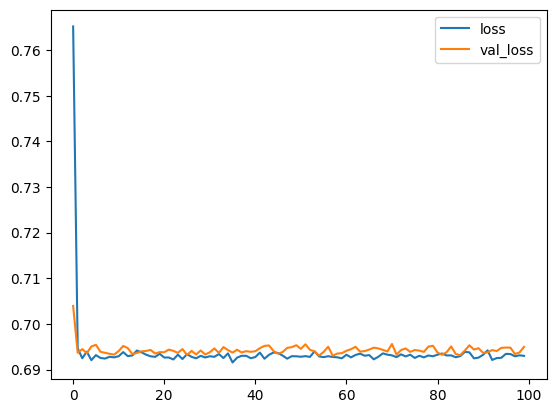

In [7]:
plot_history(r, 'loss')

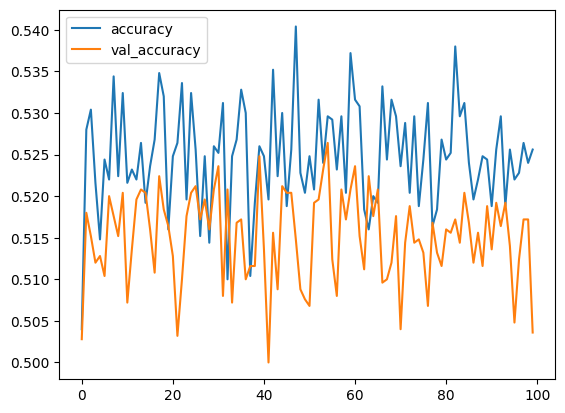

In [8]:
plot_history(r, 'accuracy')

## Simple RNN

Testing the $xor$ problem on a simple RNN


In [9]:
# Reshaping the data to be N x T X D
inputs = np.expand_dims(X, -1)

### Short memory

Testing with the labels set based on the last 3 values


In [10]:
# Trying simple RNN
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['short'],
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5360 - val_loss: 0.6767 - val_accuracy: 0.5680
Epoch 2/200
79/79 [==============================] - 0s 956us/step - loss: 0.6638 - accuracy: 0.6220 - val_loss: 0.6368 - val_accuracy: 0.7016
Epoch 3/200
79/79 [==============================] - 0s 946us/step - loss: 0.5923 - accuracy: 0.7580 - val_loss: 0.5347 - val_accuracy: 0.8152
Epoch 4/200
79/79 [==============================] - 0s 935us/step - loss: 0.4638 - accuracy: 0.8360 - val_loss: 0.3847 - val_accuracy: 0.8892
Epoch 5/200
79/79 [==============================] - 0s 942us/step - loss: 0.3443 - accuracy: 0.8912 - val_loss: 0.2995 - val_accuracy: 0.9116
Epoch 6/200
79/79 [==============================] - 0s 939us/step - loss: 0.2798 - accuracy: 0.9108 - val_loss: 0.2486 - val_accuracy: 0.9292
Epoch 7/200
79/79 [==============================] - 0s 936us/step - loss: 0.2349 - accuracy: 0.9264 - val_loss: 0.2230 - val_accuracy: 0.9188
E

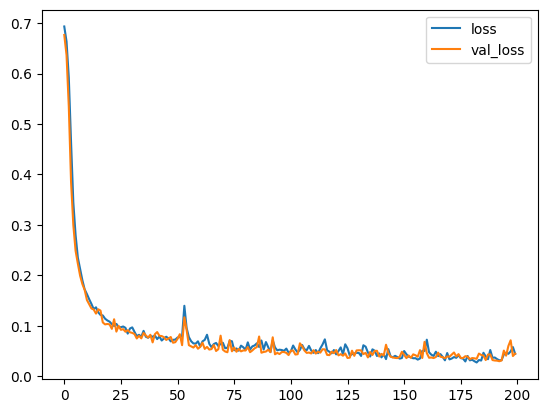

In [11]:
plot_history(r, 'loss')

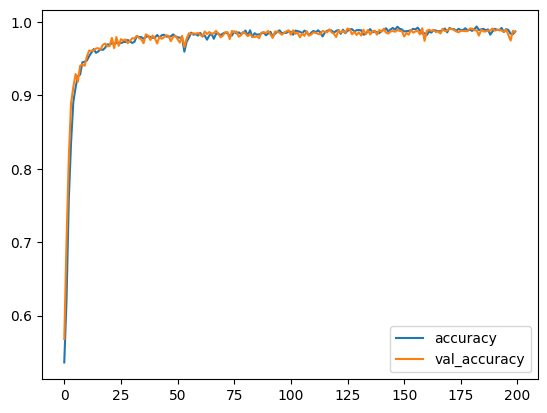

In [12]:
plot_history(r, 'accuracy')

### Long memory

Testing RNN with labels set based on the first 3 values


In [13]:
# Trying simple RNN
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.5176 - val_loss: 0.6935 - val_accuracy: 0.5176
Epoch 2/200
79/79 [==============================] - 0s 949us/step - loss: 0.6846 - accuracy: 0.5536 - val_loss: 0.6903 - val_accuracy: 0.5476
Epoch 3/200
79/79 [==============================] - 0s 926us/step - loss: 0.6747 - accuracy: 0.5952 - val_loss: 0.6922 - val_accuracy: 0.5612
Epoch 4/200
79/79 [==============================] - 0s 924us/step - loss: 0.6650 - accuracy: 0.5984 - val_loss: 0.6593 - val_accuracy: 0.6228
Epoch 5/200
79/79 [==============================] - 0s 920us/step - loss: 0.6544 - accuracy: 0.6236 - val_loss: 0.6571 - val_accuracy: 0.5956
Epoch 6/200
79/79 [==============================] - 0s 922us/step - loss: 0.6590 - accuracy: 0.6164 - val_loss: 0.6683 - val_accuracy: 0.6012
Epoch 7/200
79/79 [==============================] - 0s 917us/step - loss: 0.6312 - accuracy: 0.6604 - val_loss: 0.6262 - val_accuracy: 0.6376
E

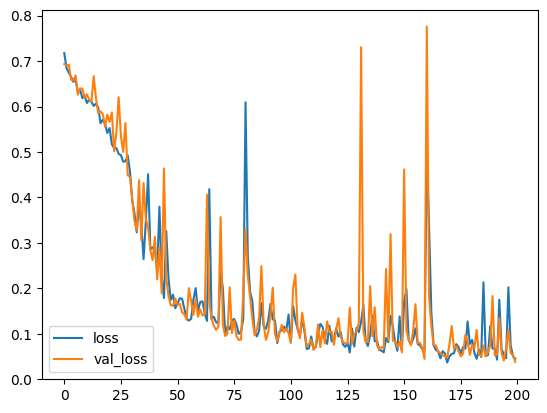

In [14]:
plot_history(r, 'loss')

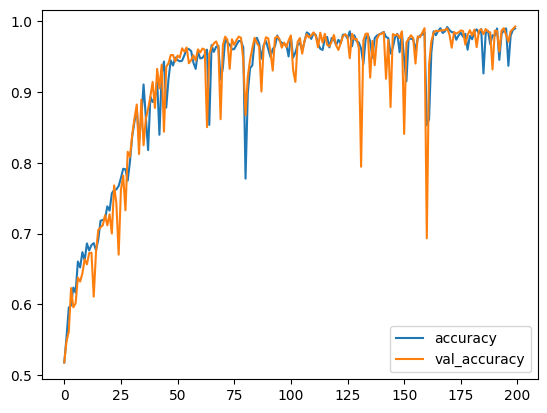

In [15]:
plot_history(r, 'accuracy')

## LSTM

Testing the $xor$ problem on a LSTM with a long memory range.


### Smaller dataset

Testing LSTM with dataset of size $T = 10$.


In [16]:
# Trying simple RNN
i = Input(shape=(T, D))
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.5084 - val_loss: 0.6939 - val_accuracy: 0.5116
Epoch 2/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6952 - val_accuracy: 0.4964
Epoch 3/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.5088
Epoch 4/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6946 - val_accuracy: 0.4868
Epoch 5/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6934 - val_accuracy: 0.5032
Epoch 6/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6936 - val_accuracy: 0.5028
Epoch 7/200
79/79 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5136 - val_loss: 0.6945 - val_accuracy: 0.4948
Epoch 8/200
7

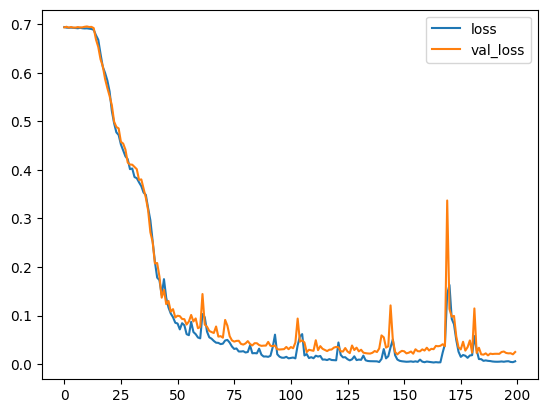

In [17]:
plot_history(r, 'loss')

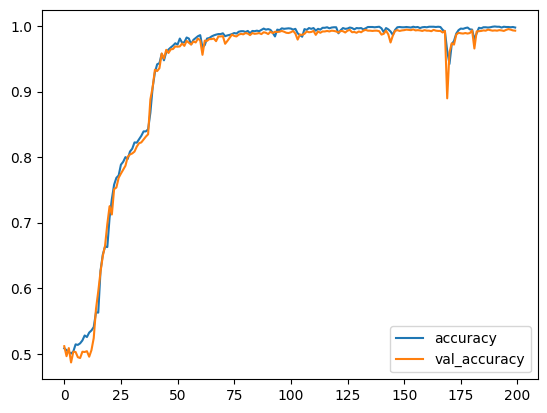

In [18]:
plot_history(r, 'accuracy')

### Larger dataset

Testing LSTM with dataset of size $T = 20$


In [19]:
T = 20

X, Y = build_dataset(T)

inputs = np.expand_dims(X, -1)

In [20]:
# Trying simple RNN
i = Input(shape=(T, D))
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5016 - val_loss: 0.6948 - val_accuracy: 0.4792
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5124 - val_loss: 0.6960 - val_accuracy: 0.4764
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5204 - val_loss: 0.6950 - val_accuracy: 0.4784
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6988 - val_accuracy: 0.4720
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6939 - val_accuracy: 0.4920
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5216 - val_loss: 0.6959 - val_accuracy: 0.4888
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5248 - val_loss: 0.6942 - val_accuracy: 0.4940
Epoch 8/200
7

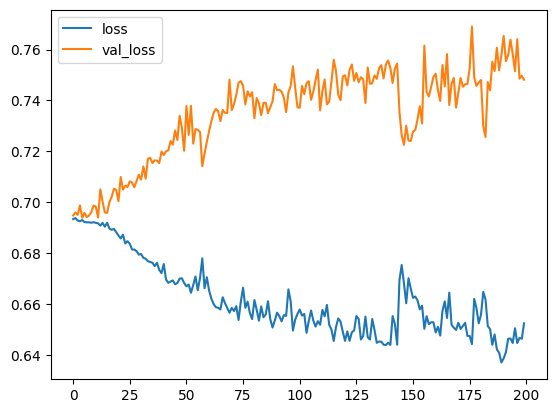

In [21]:
plot_history(r, 'loss')

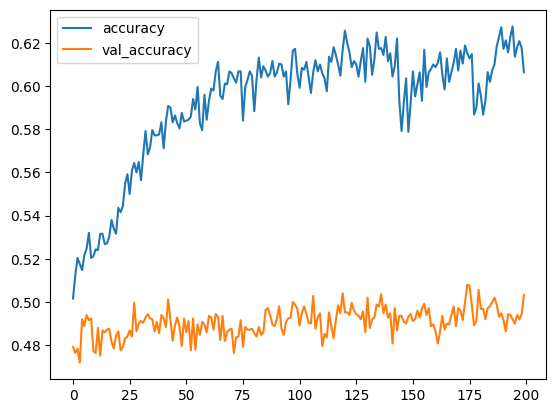

In [22]:
plot_history(r, 'accuracy')

### Even larger dataset

Testing LSTM with dataset of size $T = 30$


In [23]:
T = 30

X, Y = build_dataset(T)

inputs = np.expand_dims(X, -1)

In [24]:
# Trying simple RNN
i = Input(shape=(T, D))
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.5024
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6940 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4964 - val_loss: 0.6938 - val_accuracy: 0.4952
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4972 - val_loss: 0.6939 - val_accuracy: 0.4960
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4864 - val_loss: 0.6941 - val_accuracy: 0.5044
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6938 - val_accuracy: 0.4956
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6938 - val_accuracy: 0.5008
Epoch 8/200
7

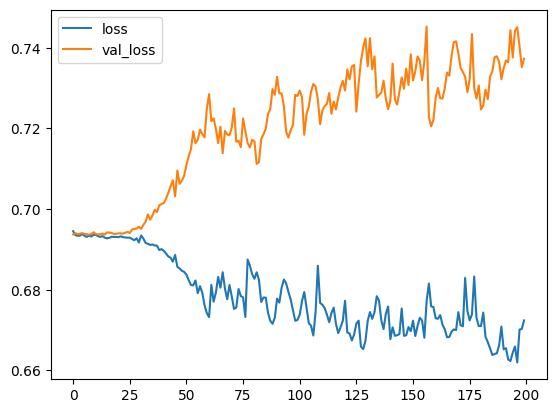

In [25]:
plot_history(r, 'loss')

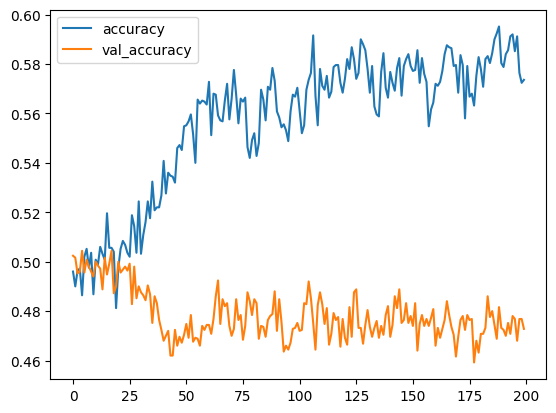

In [26]:
plot_history(r, 'accuracy')

### Long sequences and returning sequences


In [32]:
# Trying simple RNN
i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5156 - val_loss: 0.6952 - val_accuracy: 0.5096
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5120 - val_loss: 0.6892 - val_accuracy: 0.5428
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5444 - val_loss: 0.6871 - val_accuracy: 0.5624
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5680 - val_loss: 0.6872 - val_accuracy: 0.5652
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5760 - val_loss: 0.6797 - val_accuracy: 0.5904
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5996 - val_loss: 0.6738 - val_accuracy: 0.5960
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6124 - val_loss: 0.6608 - val_accuracy: 0.6272
Epoch 8/100
7

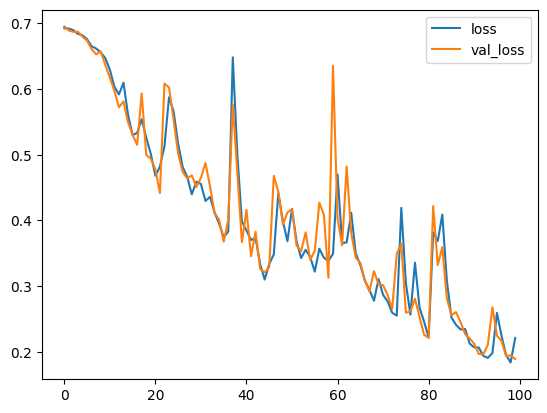

In [33]:
plot_history(r, 'loss')

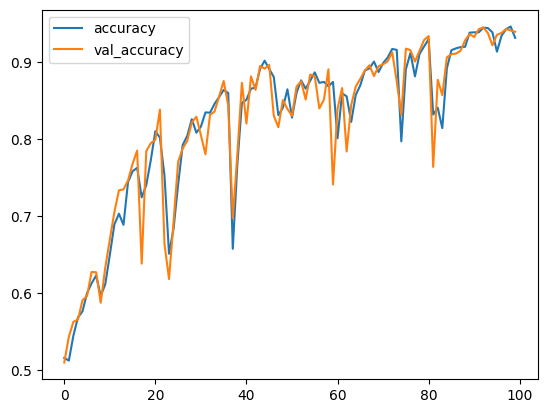

In [34]:
plot_history(r, 'accuracy')

## GRU

Testing the $xor$ problem on a GRU with a long memory range.


In [27]:
T = 20

X, Y = build_dataset(T)

inputs = np.expand_dims(X, -1)

In [28]:
# Trying simple RNN
i = Input(shape=(T, D))
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,
    Y['long'],
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 4ms/step - loss: 0.6957 - accuracy: 0.5016 - val_loss: 0.6938 - val_accuracy: 0.5056
Epoch 2/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4968 - val_loss: 0.6937 - val_accuracy: 0.5040
Epoch 3/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4976 - val_loss: 0.6943 - val_accuracy: 0.5072
Epoch 4/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5244 - val_loss: 0.6948 - val_accuracy: 0.4860
Epoch 5/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5192 - val_loss: 0.6956 - val_accuracy: 0.5040
Epoch 6/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5240 - val_loss: 0.6962 - val_accuracy: 0.5032
Epoch 7/400
79/79 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5276 - val_loss: 0.6970 - val_accuracy: 0.4884
Epoch 8/400
7

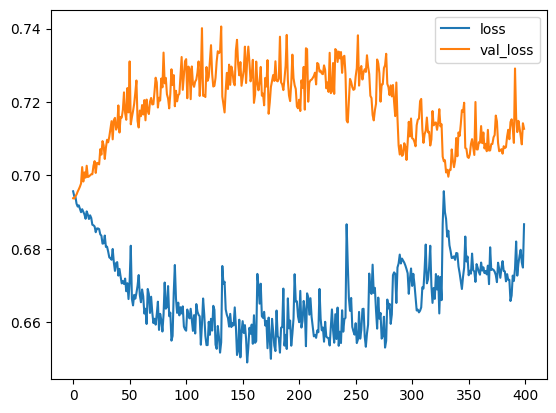

In [29]:
plot_history(r, 'loss')

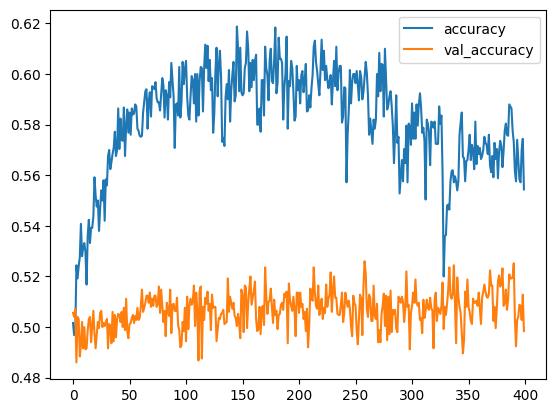

In [ ]:
plot_history(r, 'accuracy')